# Explore Dataset
In this project we are targeting to find correlation between a set of jobs, described by the job description and a group of candidates, described by their resume, so as to determine the worthiness in arranging an interview for the candidate for a particular job.

We did have a number of candidates of dataset as mentioned in the project proposal, but here are the two dataset we have finally selected for job descriptions and resumes:
- Online Job Postings – Armenian Online Job Posts from 2004 – 2015 (Hab, 2017) https://www.kaggle.com/madhab/jobposts
 - This dataset has 19000 online job posting on Armenian human resource portal, with 3759 IT jobs covering all areas.
 - The data is a bit dated but 50% of all IT jobs are after 2010
 - The average # of tokens for each post is around 300 which is suitable for BERT sentence pair classification (max 512)

- Resume Dataset from Avani Siddhapura (Siddhapura, 2020) https://www.kaggle.com/avanisiddhapura27/resume-dataset
 - This data set has 14800 IT related resumes with past job experiences, education records, certificates and skills parsed into separate sections and this is optimal for selecting target description for particular jobs title for labelling
 - All resumes in this dataset is from India which could create a bias in the training but that is common to all resume datasets available, so we will have to keep this in mind on result interpretation. As more relevant data is generated from a deployed system, the model can be retrained for data that conform to what the population is like for the particular company.

For data exploration, we are going to use LDA and BERT to see how well the data correlates to each other in the sentence vector space.

In [5]:
import spacy
#spacy.require_gpu()
nlp = spacy.load('en_trf_bertbaseuncased_lg')
#nlp = spacy.load('/opt/conda/lib/python3.7/site-packages/en_trf_bertbaseuncased_lg/en_trf_bertbaseuncased_lg-2.3.0')
#nlp = spacy.load('/opt/conda/lib/python3.7/site-packages/en_trf_robertabase_lg/en_trf_robertabase_lg-2.3.0')

In [6]:
# These functions reads in the csv file and prints out sample and summary statistics for the dataset
import pandas as pd
import ast
from functools import partial
def convert_list(x, ast_off=False):
    #print(f"x = {x}")
    if type(x) != str:
        return x
    if len(x) != 0:
        if x[0] in ["{", "["] and x[-1] in ["}", "]"] and not ast_off:
            #print(f"String to be put in AST = {x}")
            try:
                return len(ast.literal_eval(x))
            except SyntaxError:
                #print(x)
                print("1 record corrupted")
                return 0
    return len(x)

def desc_df(path, encoding=None, xls=False, ast_off=False):
    print(path)
    if xls:
        df = pd.read_excel(path)
    else:
        df = pd.read_csv(path) if encoding is None else pd.read_csv(path, encoding)
    for col in df.columns:
        print(f"{col}:\n{df.iloc[0][f'{col}']}\n")
        print(df[f'{col}'].fillna(value="").map(partial(convert_list, ast_off=ast_off)).describe())
        print("\n----------------------------------------------------------------------------------")
    df.info()
    return df

In [8]:
# This is the Job posting dataset for the Armenian Job Center
armenian_job = desc_df("D:\\PycharmProjects\\ISMT-S117-project\\data\\job\\armenian_data job posts.csv")
armenian_job

D:\PycharmProjects\ISMT-S117-project\data\job\armenian_data job posts.csv
jobpost:
AMERIA Investment Consulting Company
JOB TITLE:  Chief Financial Officer
POSITION LOCATION: Yerevan, Armenia
JOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a
Chief Financial Officer. This position manages the company's fiscal and
administrative functions, provides highly responsible and technically
complex staff assistance to the Executive Director. The work performed
requires a high level of technical proficiency in financial management
and investment management, as well as management, supervisory, and
administrative skills.
JOB RESPONSIBILITIES:  
- Supervises financial management and administrative staff, including
assigning responsibilities, reviewing employees' work processes and
products, counseling employees, giving performance evaluations, and
recommending disciplinary action;
- Serves as member of management team participating in both strategic
and operational planning for th

count    19001.000000
mean       623.274933
std        679.676290
min          0.000000
25%        216.000000
50%        460.000000
75%        810.000000
max       9250.000000
Name: JobRequirment, dtype: float64

----------------------------------------------------------------------------------
RequiredQual:
To perform this job successfully, an
individual must be able to perform each essential duty satisfactorily.
The requirements listed below are representative of the knowledge,
skill, and/or ability required.
Knowledge of:
- Generally accepted accounting principles;
- Local accounting standards and legislation;
- State reporting requirements pertaining to accounting;
- Principles and practices of financial management and budgeting;
- Principles and practices of financial systems design and analysis;
- Principles and practices of contract management, records management,
and risk management;
- Principles and practices of management and supervision;
- Principles and practices of informa

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [74]:
# Here we get 50 jobs out of the IT related job descriptions, and mix with 25 non IT jobs, and embed them with SpaCy
import numpy as np
select_job = armenian_job[armenian_job.IT][armenian_job.Title.fillna("").str.lower().str.contains("developer|programmer|admin")][:50]
select_job = select_job.append(armenian_job[~armenian_job.IT][:25], ignore_index=True)
rep_desc = np.array([nlp(w).vector for w in select_job.jobpost])
rep_title = select_job.Title
rep_desc.shape, rep_title.shape, rep_title.value_counts()

D:\ProgramData\Anaconda3\envs\ISMT-S117-project\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


((75, 768),
 (75,),
 Programmer                                                         8
 Software Developer                                                 4
 Network Administrator                                              3
 Web Programmer & Designer                                          2
 Web Programmer                                                     2
 Web Designer/ Developer                                            2
 Chief Financial Officer                                            1
 Utopian World Championship 2004                                    1
 Senior Java Developers                                             1
 Community Development, Capacity Building and Conflict              1
 Java Programmer                                                    1
 JSP/Java Developer for Lycos Mail                                  1
 Journalism Trainer                                                 1
 Web-Site Developer                                                 1


In [11]:
# Then we use t-SNE to reduce the dimension to 2D
from sklearn.manifold import TSNE
tsne_model_en_2d = TSNE(perplexity=7, n_components=2, init='pca', n_iter=5000, random_state=32)
tsne_out = tsne_model_en_2d.fit_transform(rep_desc)
print(tsne_model_en_2d.n_iter)
print(tsne_out[:5])
print(tsne_out.shape)

5000
[[ -861.8889    -486.49643 ]
 [-2636.9995    -453.30444 ]
 [-2362.2993    -756.6836  ]
 [-1261.956      -16.275225]
 [ 2293.7698      91.226166]]
(75, 2)


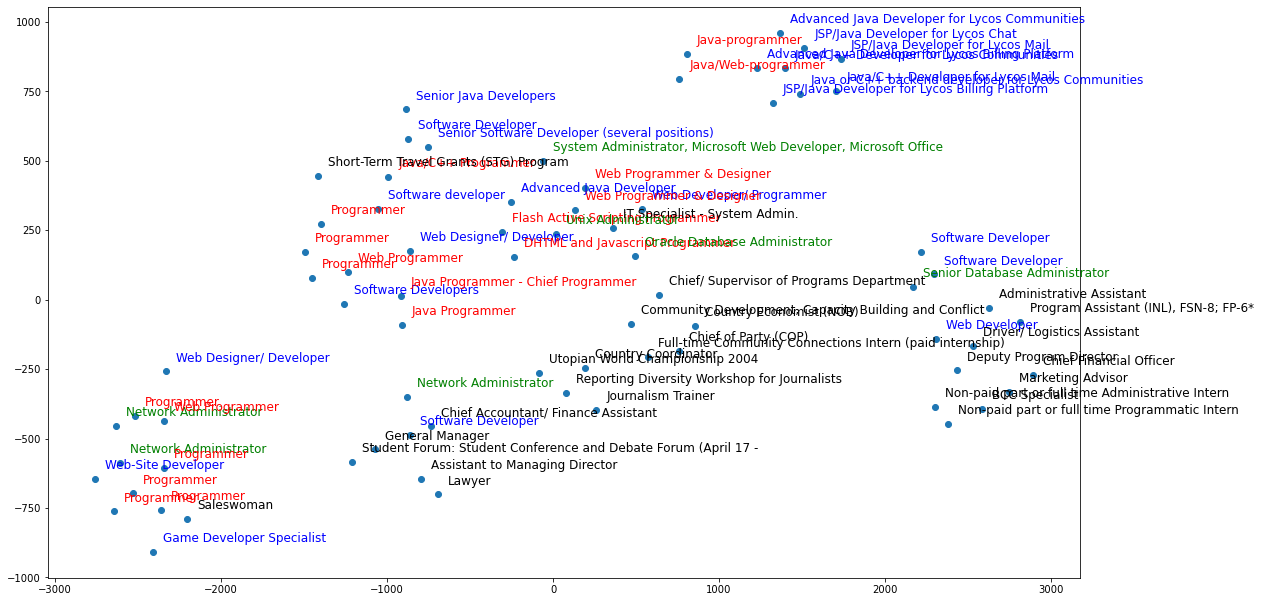

In [14]:
# Here we can see programmers and developers are really close and IT administrators are somewhere in between
# On the other hand, the non-IT tasks are generally clustered outside of the IT jobs, which shows good correlation
# in the corpus and suggesting that the transformer is a good match for the solution.
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(tsne_out[:,0], tsne_out[:,1])

for i, txt in enumerate(rep_title):
    color = "black"
    color = "red" if "programmer" in txt.lower() else color
    color = "blue" if "developer" in txt.lower() else color
    color = "green" if "administrator" in txt.lower() else color
    ax.annotate(txt, tsne_out[i], color=color, xytext=(10,10), textcoords='offset points', fontsize="12")

fig.set_size_inches(18.5, 10.5)

In [15]:
# As we see in 2.create_labels.ipynb, this is the Avani resume set, with the title and description of the past job
# experience session extracted. The Trash and Type columns are manually annotated to indicate which jobs are related to IT.
wdescr_df = pd.read_excel("D:\\PycharmProjects\\ISMT-S117-project\\data\\resumes\\avani_resume_data.xlsx")
wdescr_df = wdescr_df[(wdescr_df.wtitle != "NONE") & (wdescr_df.wdescr != "NONE")].dropna(subset=["wtitle", "wdescr"])
wdescr_df

,Unnamed: 0,res_no,exp_no,wtitle,wdescr,Trash,Type,Word Count
1,1,1,0,JAVA DEVELOPER,Working as Software Developer at IngroInfo Sof...,NaN,Dev,49.0
3,3,3,0,Java Developer,• Working as a Java Developer at Atos Syntel. ...,NaN,Dev,34.0
4,4,4,0,Java Developer,• 2+ years' of experience in application of pa...,NaN,Dev,21.0
6,6,5,0,Java Developer,Have the potential to work with team as well a...,NaN,Dev,11.0
7,7,5,1,Java Developer,Have the potential to work with team as well a...,NaN,Dev,11.0
...,...,...,...,...,...,...,...,...
35530,35530,14802,1,Accountant,for the clients and the firm in Tally ERP \n• ...,Accountant,NaN,NaN
35531,35531,14802,2,Junior Accountant,• Updating Daily Banking Transactions in Sun S...,Accountant,NaN,NaN
35532,35532,14802,3,Accountant,• Posting Accounting Entries in Tally and Proc...,Accountant,NaN,NaN
35533,35533,14802,4,TAX CONSULTANT,- Asst.Staff \n \n• Preparation of Books of Ac...,tax,NaN,NaN


In [150]:
# Similar to above, here we select 20 description each for the 3 job types, and then add another 30 jobs for non IT jobs.
select_res = wdescr_df[~wdescr_df.Type.isna()][wdescr_df.wtitle.str.lower().str.contains("developer")][:20]
select_res = select_res.append(wdescr_df[~wdescr_df.Type.isna()][wdescr_df.wtitle.str.lower().str.contains("programmer")][:20], ignore_index=True)
select_res = select_res.append(wdescr_df[~wdescr_df.Type.isna()][wdescr_df.wtitle.str.lower().str.contains("admin")][:20], ignore_index=True)
select_res = select_res.append(wdescr_df[wdescr_df.Type.isna()][30:60], ignore_index=True)
rep_desc_res = np.array([nlp(w).vector for w in select_res.wdescr])
rep_title_res = select_res.wtitle
rep_desc_res.shape, rep_title_res.shape, rep_title_res.value_counts()

D:\ProgramData\Anaconda3\envs\ISMT-S117-project\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\ProgramData\Anaconda3\envs\ISMT-S117-project\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\envs\ISMT-S117-project\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


((90, 768),
 (90,),
 Java Developer                                           15
 C                                                         3
 Sr. PHP Programmer                                        3
 SNR. C. C. E.                                             2
 Programmer Analyst Trainee                                2
                                                          ..
 part time programming tutor in CSC Computer Education     1
 Systems Analyst and Programmer                            1
 Electrical Maintenance Engineer                           1
 Java developer                                            1
 c n c                                                     1
 Name: wtitle, Length: 65, dtype: int64)

5000
[[ -102.6289    488.14197]
 [-1182.2268    271.8494 ]
 [-1424.5458    242.1394 ]
 [-2518.5405    789.96045]
 [-2518.5405    789.96045]]
(90, 2)


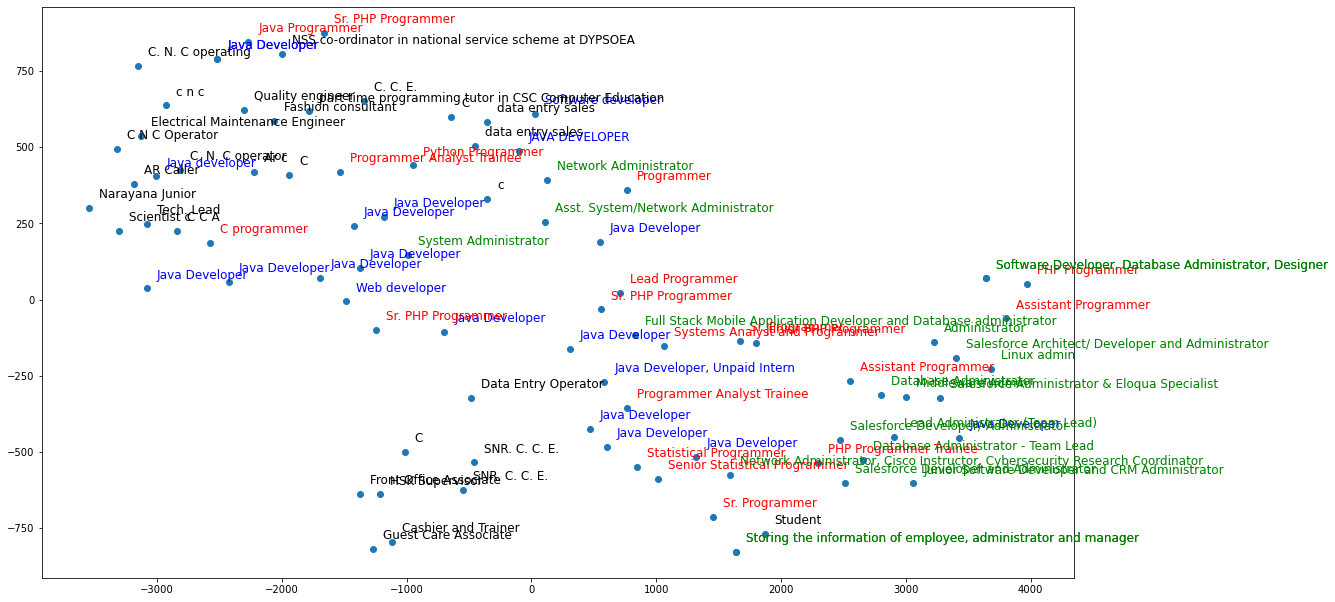

In [153]:
# Here we can still observe that developer and programmer generally goes with one another with IT admins on one side
# However we are seeing a far less distinct segmentation for non-IT jobs.
from sklearn.manifold import TSNE
tsne_model_en_2d = TSNE(perplexity=9, n_components=2, init='pca', n_iter=5000, random_state=32)
tsne_out = tsne_model_en_2d.fit_transform(rep_desc_res)
print(tsne_model_en_2d.n_iter)
print(tsne_out[:5])
print(tsne_out.shape)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(tsne_out[:,0], tsne_out[:,1])

for i, txt in enumerate(rep_title_res):
    color = "black"
    color = "red" if "programmer" in txt.lower() else color
    color = "blue" if "developer" in txt.lower() else color
    color = "green" if "admin" in txt.lower() else color
    ax.annotate(txt, tsne_out[i], color=color, xytext=(10,10), textcoords='offset points', fontsize="12")

fig.set_size_inches(18.5, 10.5)

5000
[[1179.6947  -313.31   ]
 [ 194.32811 -400.07602]
 [ 152.97987 -261.7545 ]
 [ 666.4891  -222.62035]
 [2732.46    -131.76169]]
(165, 2)


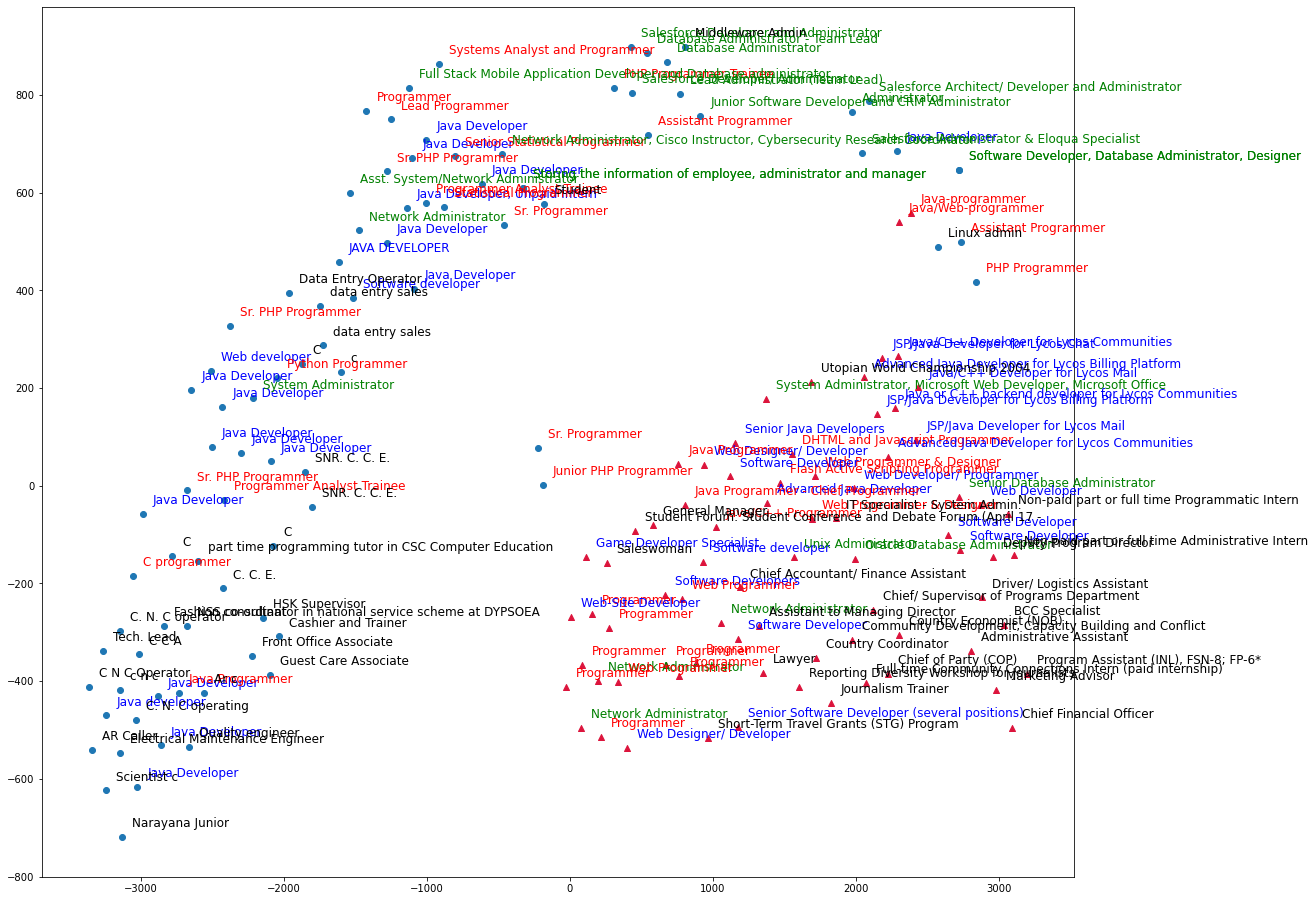

In [154]:
# Here are putting the two graphs together with jobs as circle markers and resumes as triangles. Here we can observe
# that while these two sets are descripting similar job natures, their wording are not exactly similar.
# Later in the illustration we can see that this would present problems if we use simple cosine similarities as our
# predictor for worthiness for interview of resumes.
from sklearn.manifold import TSNE
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
tsne_out = tsne_model_en_2d.fit_transform(np.append(rep_desc, rep_desc_res, axis=0))
print(tsne_model_en_2d.n_iter)
print(tsne_out[:5])
print(tsne_out.shape)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(tsne_out[:len(rep_desc),0], tsne_out[:len(rep_desc),1], marker="^", color="crimson")
ax.scatter(tsne_out[len(rep_desc):,0], tsne_out[len(rep_desc):,1], marker="o")

for i, txt in enumerate(rep_title.append(rep_title_res)):
    color = "black"
    color = "red" if "programmer" in txt.lower() else color
    color = "blue" if "developer" in txt.lower() else color
    color = "green" if "administrator" in txt.lower() else color
    ax.annotate(txt, tsne_out[i], color=color, xytext=(10,10), textcoords='offset points', fontsize="12")

fig.set_size_inches(18.5, 16)

In [28]:
# Here we do a similar exercise with LDA. While the countvectorizer is initialized with the full set
# only 1000 records are chosen to allow quick completion of this exploration.
# Here we choose a relatively large n_components in hopes to capture the variety of jobs. As shown below
# only a handle will be considered relevant in the dim-reduced representation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
np.random.seed(seed=42)
all_desc = wdescr_df[~wdescr_df.Type.isna()].iloc[:, 3:5]
shuffled_idxs = np.random.choice(range(len(all_desc)), size=1000,replace=False)

# Parameters
min_df = 1
max_df = 0.9
n_components = 100

cv = CountVectorizer(min_df=min_df, max_df=max_df, stop_words="english")
counts_vecs = cv.fit_transform(all_desc.wdescr)
print(len(cv.vocabulary_))
print(pd.DataFrame(counts_vecs.toarray(), columns=cv.get_feature_names()).shape)
print(pd.DataFrame(counts_vecs.toarray(), columns=cv.get_feature_names()))

lda = LatentDirichletAllocation(n_components=n_components, max_iter=200, evaluate_every=5, random_state=42, verbose=1, n_jobs=-1)
lda_vecs = lda.fit_transform(counts_vecs[shuffled_idxs])

# Other than the perplexity, we also use the lda.score() which is the log likelihood
lda_vecs.shape, lda.n_iter_, lda.bound_, lda.score(counts_vecs[shuffled_idxs])

37805
(19146, 37805)
       00  000  000webhostapp  002  003  005  006  008  009  0091  ...  \
0       0    0              0    0    0    0    0    0    0     0  ...   
1       0    0              0    0    0    0    0    0    0     0  ...   
2       0    0              0    0    0    0    0    0    0     0  ...   
3       0    0              0    0    0    0    0    0    0     0  ...   
4       0    0              0    0    0    0    0    0    0     0  ...   
...    ..  ...            ...  ...  ...  ...  ...  ...  ...   ...  ...   
19141   0    0              0    0    0    0    0    0    0     0  ...   
19142   0    0              0    0    0    0    0    0    0     0  ...   
19143   0    0              0    0    0    0    0    0    0     0  ...   
19144   0    0              0    0    0    0    0    0    0     0  ...   
19145   0    0              0    0    0    0    0    0    0     0  ...   

       øperformance  øprovided  øresponsible  øsuccessfully  øused  øworked  \
0          

((19146, 100), 64, 1894.4142283809701, -10115240.292981818)

Here are the results when LDA is fit with the full set
iteration: 64 of max_iter: 200
iteration: 65 of max_iter: 200, perplexity: 1894.4142
((19146, 100), 64, 1894.4142283809701, -10115240.292981818)

In [91]:
# copied from lecture 2 notebook
def display_components(model, word_features, top_display=5):
    # utility for displaying respresentative words per component for topic models
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[::-1][:top_display]
        top_words = [word_features[i] for i in top_words_idx]
        print("Topic %d: %s" % (topic_idx, " ".join(top_words)))

In [92]:
display_components(lda, cv.get_feature_names(), top_display=10)

Topic 0: stack technology java project education ip website gateway logistics ericsson
Topic 1: data using project accuracy tableau client used research analysis time
Topic 2: data using hive hadoop spark analysis hdfs big worked sql
Topic 3: 2015 college 2013 2014 engineering university 2016 year technical 2012
Topic 4: tibco plugin doing fraud worked involved application project work scm
Topic 5: server linux management servers monitoring configuration network issues support installation
Topic 6: sql database oracle data using pl procedures queries stored functions
Topic 7: based remedy asset labs application team technology bmc data used
Topic 8: com www http https website project url link php site
Topic 9: application project testing customer java non high performance based gst
Topic 10: android app application mobile ios google development user apps using
Topic 11: job profile projects role candidates recruitment creating information project description
Topic 12: server sql 2008 a

In [122]:
# Here we show those topics most relevant with the record, compared with the original text
pd.options.display.max_colwidth = None
record = 1

def display_most_relevant_topics(corpus, model, vecs, word_features, record_no, top_words=10, shuffled_idxs=shuffled_idxs):
    print(corpus.iloc[shuffled_idxs[record_no]])
    topics = pd.Series(vecs[record_no], index=range(vecs.shape[1])).sort_values(ascending=False)
    print("\nTopics with significance:")
    for topic, val in topics[topics > 0.0002].iteritems():
        print(f'Topic {topic}({round(val,4)}): {" ".join([word_features[i] for i in model.components_[topic].argsort()[::-1][:top_words]])}')

display_most_relevant_topics(all_desc, lda, lda_vecs, cv.get_feature_names(), record)
        
pd.reset_option("display.max_colwidth")

wtitle                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [156]:
# Here we use the same set of resumes we picked before, and plot it in the graph
counts_vecs_select = cv.transform(select_res.wdescr)
lda_vecs_select = lda.transform(counts_vecs_select)
lda_vecs_select.shape

(90, 100)

5000
[[ -252.657     672.66205]
 [ -386.44977   913.4619 ]
 [-2088.08      704.7038 ]
 [-1380.7683  -2941.9788 ]
 [-1380.7683  -2941.9788 ]]
(90, 2)


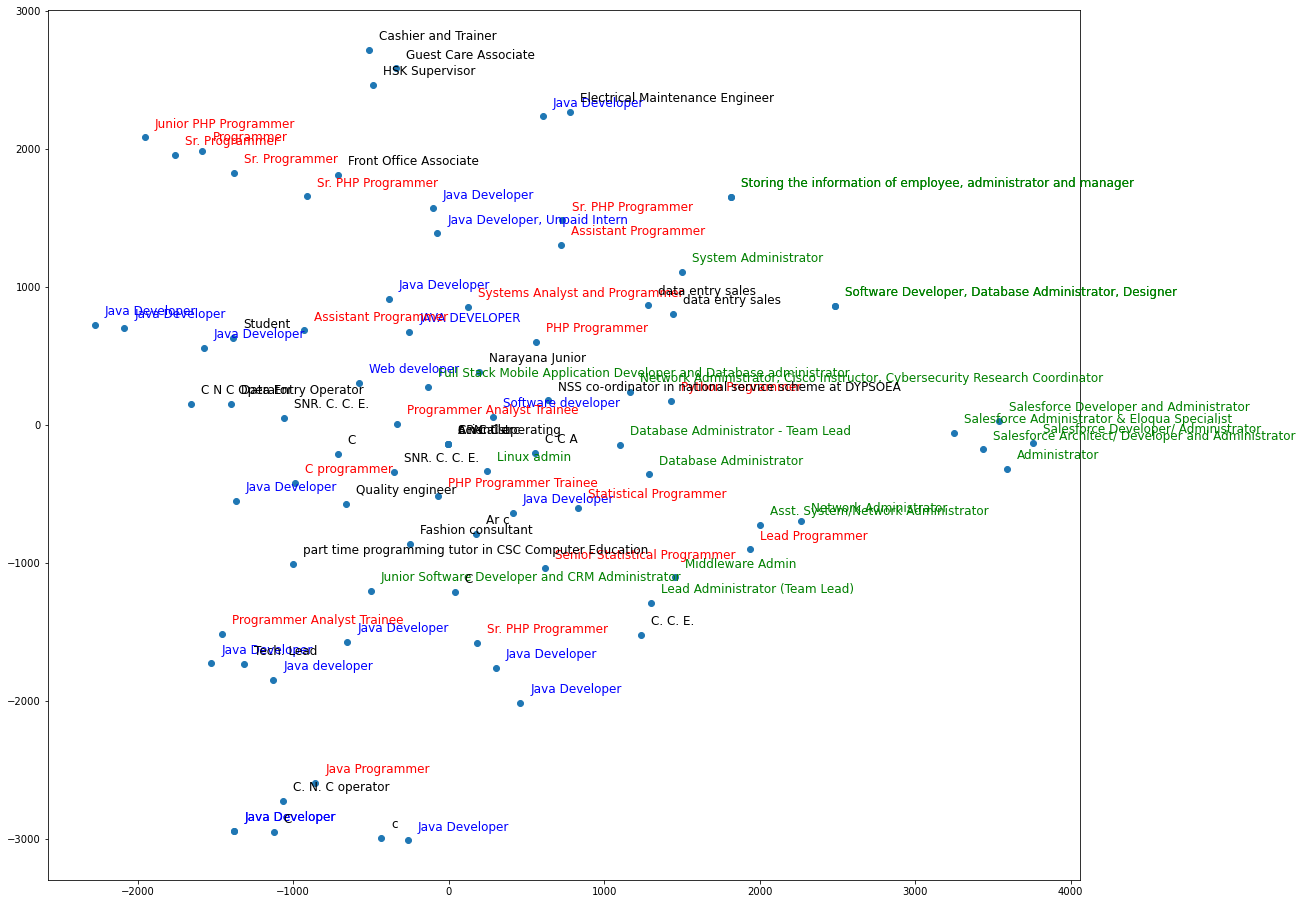

In [160]:
# Here we can see that, while the developers and programmers still group together, with the IT admins grouped aside,
# the distinction is far less clear cut. The non-IT jobs are spread across different types
from sklearn.manifold import TSNE
tsne_model_en_2d = TSNE(perplexity=7, n_components=2, init='pca', n_iter=5000, random_state=32)
tsne_out = tsne_model_en_2d.fit_transform(lda_vecs_select)
print(tsne_model_en_2d.n_iter)
print(tsne_out[:5])
print(tsne_out.shape)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(tsne_out[:,0], tsne_out[:,1])

for i, txt in enumerate(select_res.wtitle):
    color = "black"
    color = "red" if "programmer" in txt.lower() else color
    color = "blue" if "developer" in txt.lower() else color
    color = "green" if "admin" in txt.lower() else color
    ax.annotate(txt, tsne_out[i], color=color, xytext=(10,10), textcoords='offset points', fontsize="12")

fig.set_size_inches(18.5, 16)

In [85]:
# Here we perform a similar procedure for the job descriptions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
np.random.seed(seed=42)
all_desc_job = armenian_job[armenian_job.IT][["Title", "jobpost"]].dropna()
shuffled_idxs_job = np.random.choice(range(len(all_desc_job)), size=1000,replace=False)

# Parameters
min_df = 1
max_df = 0.9
n_components = 100

cv_job = CountVectorizer(min_df=min_df, max_df=max_df, stop_words="english")
counts_vecs_job = cv_job.fit_transform(all_desc_job.jobpost)
print(len(cv_job.vocabulary_))
print(pd.DataFrame(counts_vecs_job.toarray(), columns=cv_job.get_feature_names()).shape)
print(pd.DataFrame(counts_vecs_job.toarray(), columns=cv_job.get_feature_names()))

lda_job = LatentDirichletAllocation(n_components=n_components, max_iter=200, evaluate_every=5, random_state=42, verbose=1, n_jobs=-1)
lda_vecs_job = lda_job.fit_transform(counts_vecs_job[shuffled_idxs_job])
lda_vecs_job.shape, lda_job.n_iter_, lda_job.bound_, lda_job.score(counts_vecs_job[shuffled_idxs_job])

11681
(3759, 11681)
      00  000  0001  0002  00035799  00037711  00049248  00051202  00057507  \
0      1    0     0     0         0         0         0         0         0   
1      1    0     0     0         0         0         0         0         0   
2      0    0     0     0         0         0         0         0         0   
3      0    0     0     0         0         0         0         0         0   
4      0    0     0     0         0         0         0         0         0   
...   ..  ...   ...   ...       ...       ...       ...       ...       ...   
3754   0    0     0     0         0         0         0         0         0   
3755   0    0     0     0         0         0         0         0         0   
3756   0    0     0     0         0         0         0         0         0   
3757   0    0     0     0         0         0         0         0         0   
3758   0    0     0     0         0         0         0         0         0   

      0009  ...  zohrabian  zon

((1000, 100), 124, 1151.6760774150612, -1119306.5209478487)

In [114]:
display_components(lda_job, cv_job.get_feature_names(), top_display=10)

Topic 0: software development services work ability cjsc company developer time team
Topic 1: web candidates cjsc hsbc form programmers work time group april
Topic 2: multi breakfast kitchen stocked parts development tools flexible currently unlimited
Topic 3: credit rural program loan wtm guidelines water lending mca irrigation
Topic 4: data reporting business analysis reports requirements intelligence work analyze develop
Topic 5: web mail programmer studio matit script sites nwslab following xml
Topic 6: lycos europe company java web english development role php european
Topic 7: tools builds source control systems infrastructural manage 2008 information candidates
Topic 8: zvartnots easygoing eastern east easily ease earth early earliest earlier
Topic 9: migrants health 2013 research local iom medical analysis international consultancy
Topic 10: labview national instruments november 00 software open foundation school lesson
Topic 11: tel cell responsible cjsc intake payments operat

In [124]:
pd.options.display.max_colwidth = None
record = 0

display_most_relevant_topics(all_desc_job, lda_job, lda_vecs_job, cv_job.get_feature_names(), record, shuffled_idxs=shuffled_idxs_job)
        
pd.reset_option("display.max_colwidth")

Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [126]:
counts_vecs_select_job = cv_job.transform(select_job.jobpost)
lda_vecs_select_job = lda_job.transform(counts_vecs_select_job)
lda_vecs_select_job.shape

(75, 100)

5000
[[  80.66081   -13.472679]
 [  36.33593   -65.90476 ]
 [-114.63907   -70.17123 ]
 [-151.15155   -10.476804]
 [ 157.99574    42.573868]]
(75, 2)


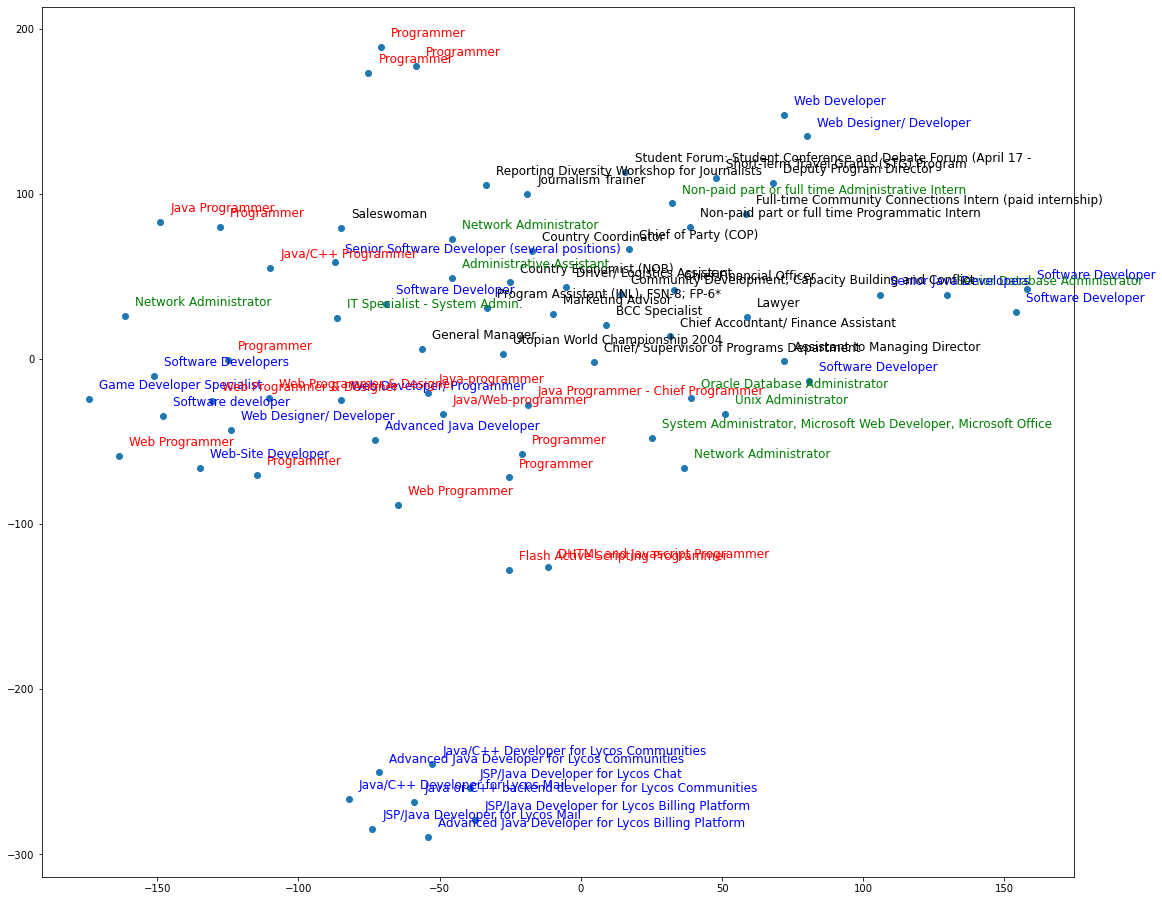

In [162]:
# Again we see a less than clear cut grouping with developers, programmers, IT admins, and non IT jobs
from sklearn.manifold import TSNE
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
tsne_out = tsne_model_en_2d.fit_transform(lda_vecs_select_job)
print(tsne_model_en_2d.n_iter)
print(tsne_out[:5])
print(tsne_out.shape)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(tsne_out[:,0], tsne_out[:,1])

for i, txt in enumerate(select_job.Title):
    color = "black"
    color = "red" if "programmer" in txt.lower() else color
    color = "blue" if "developer" in txt.lower() else color
    color = "green" if "admin" in txt.lower() else color
    ax.annotate(txt, tsne_out[i], color=color, xytext=(10,10), textcoords='offset points', fontsize="12")

fig.set_size_inches(18.5, 16)